# Machine Learning Snippet 02
### <i>Summary of Analysis</i>
- <b>Dataset</b> :: Random data
- <b>Task</b> :: Regression, Classification
- <b>Evaluation</b> :: -
- <b>Library</b> :: sklearn
- <b>Results</b>

### 回帰モデルのフィッティング
#### 分析環境の構築

In [1]:
import sklearn as skl
from sklearn.svm import SVR
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "retina"

#### データセット準備
乱数を発生させてデータセットを作成する．ここでy[::5]における5は刻み幅を示しており，0，5，10，15・・・番目のデータに右辺を加える。

In [2]:
np.random.seed(123)
x = np.sort(5 * np.random.rand(40, 1), axis = 0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(len(y[::5])))

データセットの内容を確認すると，上記の処理で乱数が加えられたデータのみsinの曲線から外れていることがわかる．

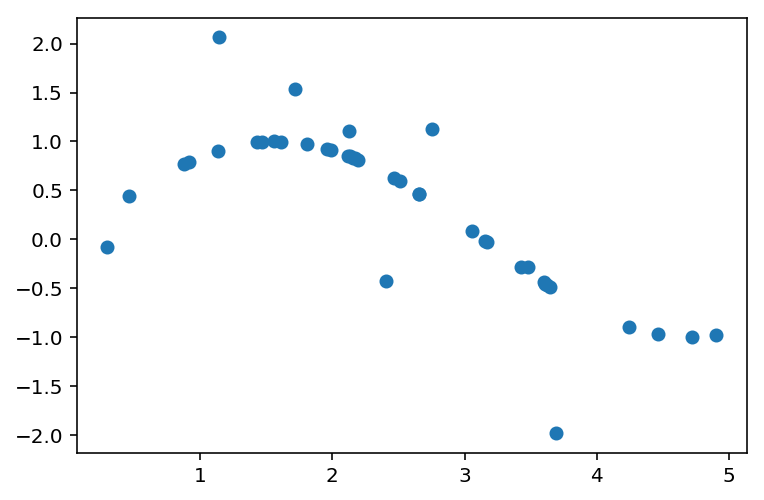

In [3]:
plt.plot(x, y, "o")

#### フィッティング
SVRを用いて学習器を作成する．kernelとしてrbf，linear，polyそれぞれを指定した場合の結果を示す．なおPythonでは多くの場合、fitで学習，predictで予測となる．

In [4]:
svr_rbf  = SVR(kernel='rbf',    C = 1e3, gamma=0.1)
svr_lin  = SVR(kernel='linear', C = 1e3)
svr_poly = SVR(kernel='poly',   C = 1e3, degree=2)

y_rbf  = svr_rbf.fit(x, y).predict(x)
y_lin  = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)

#### プロット
結果をプロットする．xが元のデータで、oが各学習器の結果を示す．linear，polyのkernelはあまり上手くいっていない様子だが，rbfはかなり元のデータを表現できている．

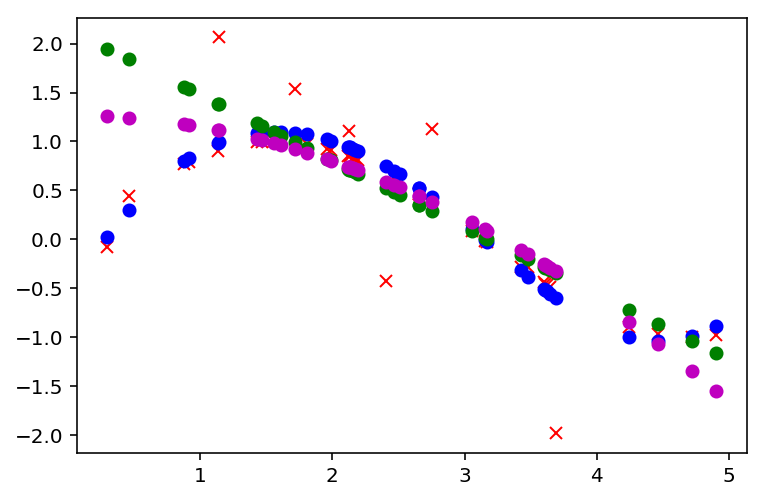

In [5]:
plt.plot(x, y, "x", color="r")
plt.plot(x, y_rbf, "o", color = "b")
plt.plot(x, y_lin, "o", color = "g")
plt.plot(x, y_poly, "o", color = "m")

### 分類モデルのフィッティング
#### 分析環境の構築

In [6]:
from sklearn.svm import SVC

#### データセット準備
分類のためのデータセットを作成する．なおnp.logical_xorは排他的論理和を意味し，インプットが異なる場合に True を，同値なら False を返す．

In [7]:
np.random.seed(123)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [8]:
Y_df = pd.DataFrame(Y)
Y_df.head()

,0
0,True
1,True
2,True
3,False
4,True


XとYの関係は以下の通り．

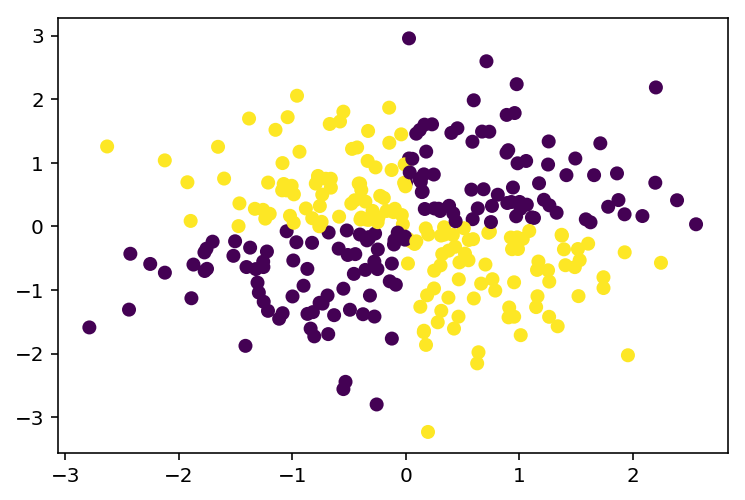

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

#### フィッティング
SVMによる分類器の作成を行う．kernelにはrbfを用いる．

In [10]:
clf = SVC(kernel='rbf', C = 1e3, gamma = 0.1)
clf.fit(X, Y)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

決定関数までの距離を計算

In [11]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### プロット
いわゆるXOR問題を上手く分類できていることがわかる．

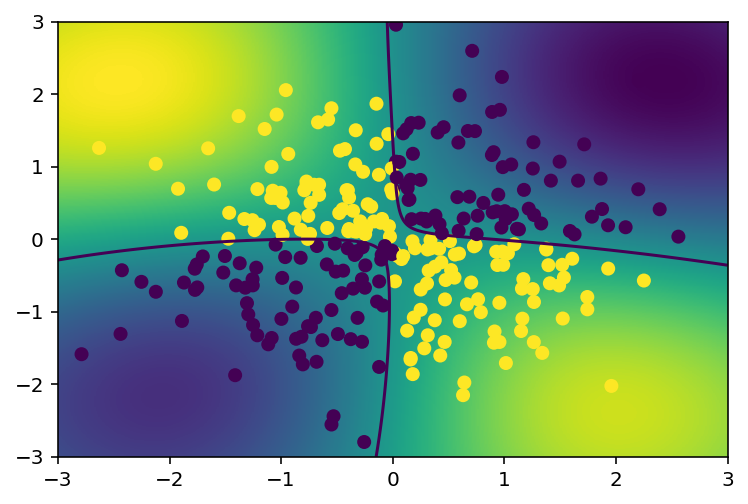

In [12]:
plt.imshow(Z, interpolation='nearest', extent=[xx.min(),
    xx.max(),
    yy.min(),
    yy.max()],
    aspect='auto',
    origin='lower',
    )

ctr = plt.contour(xx, yy, Z, levels=[0])
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])
plt.show()